In [1]:
import numpy as np
import pandas as pd
from scipy import stats
from matplotlib import pyplot as plt

In [2]:
np.random.randint(0,100)

77

In [3]:
a = np.arange(10)
np.random.choice(a,5,replace=True)

array([8, 9, 3, 3, 7])

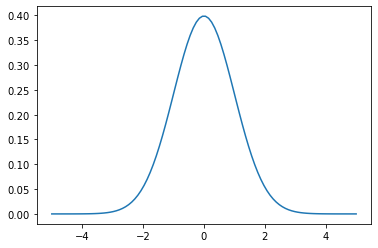

In [4]:
dist_norm = stats.norm(loc=0,scale=1)
x = np.linspace(-5,5,100)
y = dist_norm.pdf(x)

plt.plot(x,y)
plt.show()

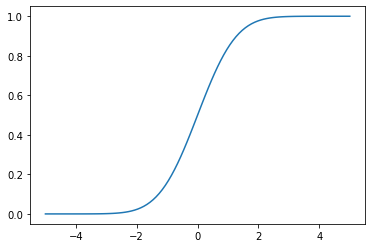

In [5]:
y2 = dist_norm.cdf(x)

plt.plot(x,y2)
plt.show()

In [6]:
a = dist_norm.ppf(0.05)
b = dist_norm.ppf(0.95)
print(a, b)

-1.6448536269514729 1.6448536269514722


(array([ 1.,  1.,  1.,  2.,  1.,  1.,  3.,  0.,  6.,  3.,  8., 13., 15.,
        14., 13., 11., 20., 32., 39., 27., 28., 44., 33., 49., 44., 42.,
        46., 59., 38., 47., 44., 46., 32., 22., 32., 39., 34., 24., 20.,
        16.,  9.,  6.,  8.,  4.,  6.,  2.,  7.,  3.,  2.,  3.]),
 array([-3.15695811, -3.03863788, -2.92031765, -2.80199743, -2.6836772 ,
        -2.56535697, -2.44703674, -2.32871651, -2.21039629, -2.09207606,
        -1.97375583, -1.8554356 , -1.73711538, -1.61879515, -1.50047492,
        -1.38215469, -1.26383447, -1.14551424, -1.02719401, -0.90887378,
        -0.79055355, -0.67223333, -0.5539131 , -0.43559287, -0.31727264,
        -0.19895242, -0.08063219,  0.03768804,  0.15600827,  0.27432849,
         0.39264872,  0.51096895,  0.62928918,  0.74760941,  0.86592963,
         0.98424986,  1.10257009,  1.22089032,  1.33921054,  1.45753077,
         1.575851  ,  1.69417123,  1.81249145,  1.93081168,  2.04913191,
         2.16745214,  2.28577237,  2.40409259,  2.52241282,

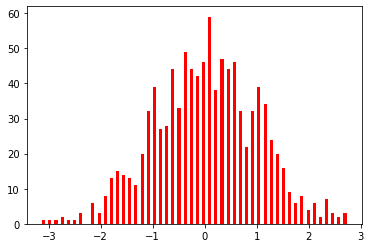

In [7]:
sample = dist_norm.rvs(size=1000)
plt.hist(sample,bins=50,rwidth=0.5,color='r')

In [8]:
sample_mean = np.mean(sample)
sample_var = np.var(sample)
print(sample_mean,sample_var)

0.026328934293416213 0.9869334328751584


In [21]:
data = pd.read_csv('./sample.csv',header=None)
data.head()

,0
0,109.0
1,110.0
2,108.0
3,110.0
4,109.0


In [27]:
data.columns = ['IQ']
data_list = data['IQ'].to_list()
print(data_list)

[109.0, 110.0, 108.0, 110.0, 109.0, 111.0, 111.0, 110.0, 109.0, 111.0, 109.0, 110.0, 110.0, 108.0, 109.0, 110.0, 109.0, 110.0, 110.0, 110.0, 110.0, 109.0, 110.0, 110.0, 110.0, 112.0, 110.0, 109.0, 108.0, 109.0]


In [33]:
pop_mean0 = 100
pop_std = np.sqrt(80)

n = data.shape[0]

sample_mean = np.mean(data_list)
sample_var = np.var(data_list,ddof=1)

T = (sample_mean - pop_mean0) / (pop_std/np.sqrt(n))

print("Test statistic is {}".format(np.round(T,3)))

Test statistic is 5.92


In [36]:
alpha = 0.05
dist_norm = stats.norm(loc=0,scale=1)

ll = dist_norm.ppf(alpha/2)
ul = dist_norm.ppf(1-(alpha/2))

print("critical values are {} and {}".format(np.round(ll,3),np.round(ul,3)))

critical values are -1.96 and 1.96


In [38]:
if (np.abs(T) > ul):
    print("we can reject H0")
else:
    print("we accept H0")

we can reject H0


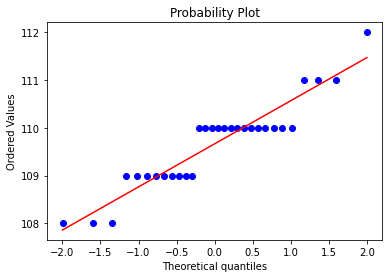

In [42]:
stats.probplot(data_list,plot=plt,dist='norm')
plt.show()